<a href="https://colab.research.google.com/github/cnwokoye1/Logistic-Regression-and-Feature-Engineering-for-Wine-Quality-Prediction/blob/main/A3_LogisticRegression_MLP_Nwokoye_Christopher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your Name Here: Christopher Nwokoye


# A3 LogisticRegression, Multi-layer Perceptron (MLP)

## 1. Load data and perform general EDA (3+2+1+3+6 = 15pts)

### 1.1 import libraries: numpy, matplotlib.pyplot and pandas. (1+1+1 = 3pts)

You can import other libraries below as needed in any block.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1.2 import the data to a pandas dataframe and show the count of rows and columns (2pts)

In [ ]:
# import and mount google drive
# to be able to access stored files
from google.colab import drive
drive.mount('/content/drive')

# import data from file to pandas dataframe
file_path = '/content/drive/MyDrive/Colab Notebooks/A3_LogisticRegression_MLP/Wine_Quality_Data.csv'
df = pd.read_csv(file_path)

# show count of rows and columns of df
print('Number of rows: ' + str(len(df)))
print('Number of columns: ' + str(len(df.columns)))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of rows: 6497
Number of columns: 13


### 1.3 Show if any column has null values. (1pt)

In [ ]:
df.isnull()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


### 1.4 We will use the 'quality' column as our target label. Print the count of each label in the dataset (in percentage). Mention which quality scores are among top 3 by their counts. (3pts)

In [ ]:
print(df.sort_values(by='quality', ascending=False))

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
2475            6.9             0.360         0.34             4.2      0.018   
3204            7.1             0.260         0.49             2.2      0.032   
2426            7.4             0.240         0.36             2.0      0.031   
2373            9.1             0.270         0.45            10.6      0.035   
2419            6.6             0.360         0.29             1.6      0.021   
...             ...               ...          ...             ...        ...   
3649           11.8             0.230         0.38            11.1      0.034   
1374            6.8             0.815         0.00             1.2      0.267   
4906            9.4             0.240         0.29             8.5      0.037   
1299            7.6             1.580         0.00             2.1      0.137   
1469            7.3             0.980         0.05             2.1      0.061   

      free_sulfur_dioxide  

### 1.5 Observe the correlation matrix for the columns. Name the pairs of columns with highest positive and highest negative correlations. (2+4 = 6pts)

You can import and use seaborn here to visualize correlation matrix in a heatmap.

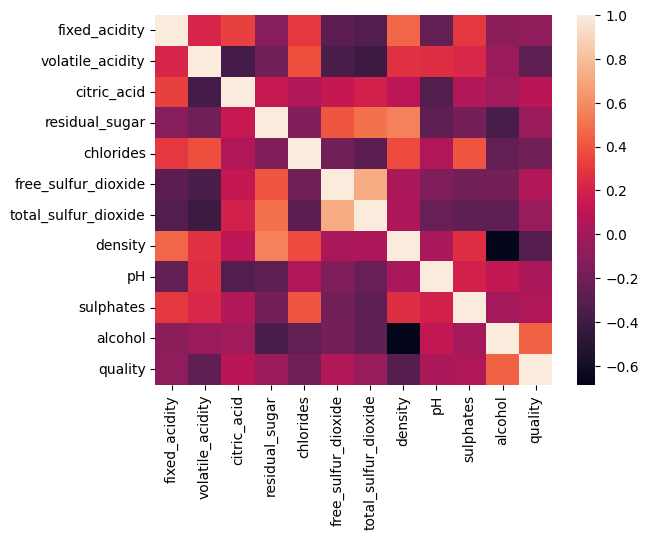

In [ ]:
import seaborn as sb
dataplot = sb.heatmap(df.corr())
plt.show()

## 2. Feature Selection and Preprocessing (2+2+3+3 = 10pts)

### 2.1 Drop the 'color' attribute from the dataframe. (2pts)

In [ ]:
df_2 = df.drop(['color'], axis=1)

### 2.2 Assign the 'quality' column to target label y, and all other columns to attribute matrix X (1+1 = 2pts)

In [ ]:
# attribute matrix X
X = df_2.drop(['quality'], axis=1).values

# target label y
y = df_2['quality'].values

### 2.3 Use scikitlearn's Standard Scaler to scale the feature matrix X. (3pts)

In [ ]:
# import needed library
from sklearn.preprocessing import StandardScaler

# instantiate StandardScaler
scaler = StandardScaler()

# scale feature X
X_scaled = scaler.fit(X) # fix error (could not convert string to float: 'red')


### 2.4 Split Dataset into Training and Test set. (3 pts)
Use 80:20 split for training and test. Also use stratified sampling to ensure balanced dataset.

In [ ]:
# import needed library
from sklearn.model_selection import train_test_split

# split data set into training & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Logistic Regression from scratch (10+10+10+25+20 = 75pts)


In this section, you will write a logistic regression algorithm from scratch using python and numpy. You will first write some helper functions for transforming label encoding to one-hot encoding, for measuring the cross-entropy loss and predicting labels from test data. These functions will later be used in the logistic regression training and testing.

### 3.1 The target label in our dataset is the 'quality' column. It consists of categorical values, label-encoded with 7 values in the range [3-9]. To perform a multiclass logistic regression, you need a function that takes a label matrix and converts it to One-hot encoded labels. (10pts)

Write the function below following the docstring.

In [ ]:
def onehot(y):
    """
    Converts an array of labels to one-hot encoding.

    Parameters:
    -----------
    y : numpy.ndarray
        An array of labels. It must have a shape of (n_samples, ).

    Returns:
    --------
    numpy.ndarray
        A matrix of one-hot encoding. It has a shape of (n_samples, n_classes).
    """

    # import needed library (numpy & pandas are already imported)
    from sklearn.preprocessing import OneHotEncoder

    # instantiate OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    # perform one-hot encoding on y numpy array
    encoder_df = pd.DataFrame(encoder.fit_transform(y))

    # merge one-hot encoded columns back w/ original df
    final_df = df_2.join(encoder_df)

    print(final_df) # show final df


### 3.2 For multi-class classification, you also need to measure cross-entropy loss. Cross-entropy loss is measured by the following formula:
$\text{Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^n y_{ij} \log \hat{y}_{ij}$

Write a function that takes two matrices: one matrix of true labels $y_{ij}$, and one matrix of the predicted labels by your model $\hat{y}_{ij}$ (you are about to write the model function soon below), and returns the computed loss. **(10pts)**


In [ ]:
def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss between the true labels and predicted labels.

    Parameters
    ----------
    y_true : numpy array
        Array of true labels with shape (m, n_classes).
    y_pred : numpy array
        Array of predicted labels with shape (m, n_classes).

    Returns
    -------
    float
        Cross-entropy loss between y_true and y_pred.

    Notes
    -----
    This function assumes that the labels are one-hot encoded.
    """

    if y_true == 1:
      return -np.log(y_pred)
    else:
      return -np.log(1 - y_pred)


### 3.3 Write a function for softmax activation to compute probabilities from the linear score $z_i$. Softmax function uses the following formula:
$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}} , \text{for } i=1,2,3,...,k $$
where $z_i$ is the linear layer score for i-th input.

**(10pts)**

In [ ]:
def softmax(scores):
    """
    Compute the softmax of the given scores.

    Parameters:
    -----------
    scores : numpy.ndarray
        A 2D numpy array of shape (m, n), where m is the number of samples and n is the number of classes.

    Returns:
    --------
    probs : numpy.ndarray
        A 2D numpy array of shape (m, n) containing the probabilities of each sample belonging to each class.
    """

    # compute probabilities for scores and display them
    softmax_scores = np.exp(scores) / np.sum((np.exp(scores)))
    print(softmax_scores)

### 3.4 Model development (20+5 = 25pts)

**3.4.1** Write a function for the logistic regression algorithm. You will use the functions you have written above in this module. Recall that with gradient descent optimization, the computation loop goes as:
For each epoch:
1. Compute $scores = X_{train} W + b$
2. Compute probability = softmax(scores)
3. Compute Cross-entropy Loss
4. Compute gradients of the loss with respect to the weights and bias.

    Partial derivative of Loss with respect to Weight matrix:
    $$\frac{\partial L}{\partial W} = -\frac{1}{m} X^T \left(y - \hat{y}\right)$$

    Partial derivative of Loss with respect to Bias matrix:
    $$\frac{\partial L}{\partial b_j} = -\frac{1}{m} \sum_{i=1}^m \left(y_{ij} - p_{ij}\right) $$

5. Update the weights and biases
    $$ W = W - (learning\ rate * weight\ gradient)  $$
    $$ b = b - (learning\ rate * weight\ gradient)  $$

**(20pts)**

In [ ]:
def logistic_regression(X_train, y_train, ):
    """
    Performs logistic regression using softmax activation and gradient descent optimizer to classify the input data.

    Parameters:
    -----------
    X_train : numpy.ndarray
        The input training data of shape (num_samples, num_features).
    y_train : numpy.ndarray
        The training labels of shape (num_samples,).

    Returns:
    --------
    W : numpy.ndarray
        The learned weights of shape (num_features, num_classes).
    b : numpy.ndarray
        The learned bias of shape (1, num_classes).
    loss_list : list
        The list of loss values at each epoch during training.
    """

    # get the number of samples and features from X_train (2pts)
    print(X_train.shape)

    # convert training labels to one-hot encoded labels (2pts)
    train_labels_onehot = onehot(X_train)

    # get the number of target classes from y_train (2pts)
    print(y_train.shape)

    # initialize the weights and bias with numpy arrays of zeros (1+1 = 2pts)
    num_features = len(X_train)
    num_classes = len(X_train.columns)

    W = np.zeros([num_features, num_classes], dtype = int)
    b = np.zeros([1, num_classes], dtype = int)

    # set hyperparameters (1+1 = 2pts)
    learning_rate = 0.0001


    ## set the max number of epochs you want to train for
    # (number of iterations to perform gradient descent)
    num_epochs = 1000

    ## initialize a list to store the loss values (1pt)
    list_loss = []


    '''
    Write a for loop over epochs.
    In each epoch:
        compute the score for each class,
        compute the softmax probabilities,
        compute the cross-entropy loss,
        compute the gradients of the loss with respect to the weights and bias,
        update the weights and bias using the gradients and the learning rate.
    '''
    # (9pts)
    # (loop to perform gradient descent)
    for epoch in range(num_epochs):

        # compute the score (Z) for each class.
        Z = softmax(X_train)

        # calculate the softmax probabilities
        Y_pred = W*X_train + b # current predict value of Y

        # compute the cross-entropy loss
        list_loss = y_train - Y_pred

        # compute the gradients of the loss with respect to the weights and bias
        D_W = (-2/num_features) * sum(X_train * (y_train - Y_pred)) # derivative wrt W
        D_b = (-2/num_features) * sum(y_train - Y_pred) # derivative wrt b

        # update the weights and bias using the gradients and the learning rate
        W = W - learning_rate * D_W
        b = b - learning_rate * D_b

        # For tracking progress, print the loss every 100 epochs
        if epoch % 100 == 0:
          print(W, b)



**3.4.2** Now that you have the model and the helper function, train the model with your prepared training dataset. Then plot the training loss curve. **(5pts)**

In [ ]:
# train the model
logistic_regression(X_train, y_train)

# plot the loss curve
plt.plot(list_loss)
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

### 3.5 Evaluation (10+1+4+3+2 = 20pts)

Write a function to predict the labels of X_test using the model trained above and return the predicted labels as categorical values similar to train labels. **(10pts)**

Note: By default, the predicted labels may return values within [0-6] instead of the original labels [3-9]. This can happen due to using argmax() to get label encoding from one-hot encoding when predicting test labels. You can add a simple offset to the argmax outputs of predicted labels to shift them to the range of [3-9]. This is important to note as you may see a very low accuracy even with a good model if true labels and predicted labels are not associated with the same categorical scale.

In [ ]:
def predict(X_test, W, b):
    '''
    X_test: a numpy array of testing features
    W: a numpy array of weights
    b: a numpy array of bias
    return: a numpy array of one-hot encoded labels
    '''
    # compute the scores
    scores = X_test * W + b

    # compute the probabilities
    prob = softmax(scores)

    # get the predicted labels
    print("Max element: ", np.argmax(prob))

    # return the predicted labels
    print("Indices of max element: ", np.argmax(prob, axis=0))
    print("Indices of max element: ", np.argmax(prob, axis=1))

**3.5.1** import accuracy_score, confusion_matrix, precision_score, recall_score and f1_score from scikitlearn **(1pts)**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

**3.5.2** Print the prediction scores on test data in terms of accuracy, precision and recall score. **(4pts)**

In [ ]:
print("Accuracy scores: ", accuracy_score(X_test, scores))
print("Recall scores: ", recall_score(X_test, scores))
print("Precision scores: ", precision_score(X_test, scores))

**3.5.3** Generate and visualize the confusion matrix. You can use seaborn heatmap to visualize a heatmap of the confusion matrix. **(3pts)**

In [ ]:
# generate confusion matrix
cf_matrix = confusion_matrix(X_test, scores)
print("Confusion matrix: ", cf_matrix)

# visualize heatmap of confusion matrix
labels = ["True Negative","False Positive","False Negative","True Positive"]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

**3.5.4** Which labels seem to be harder to classify for this model? **(2pts)**

I observed or noticed the true negative and true positive labels to be quite laborious to classify or group.

## 4. Using Scikitlearn Logistic Regression (4+2+7+2 = 15pts)

### 4.1 Import LogisticRegressionCV module and create an instance of it. (4pts)
Use the following parameters:
1. 5-fold crossvalidation,
2. lbfgs solver,
3. run for 1000 iterations
4. use 'multinomial' for choosing softmax classifier

In [ ]:
# import module
from sklearn.linear_model import LogisticRegressionCV

# create instance of module
clf = LogisticRegressionCV(cv=5, solver='lbfgs', max_iter=1000)

### 4.2 Train the model and predict the labels for test set. (2pts)

In [ ]:
# train the model
logistic_regression(X_train, y_train)

# predict labels
predict(X, W, b)

### 4.3 Compute the accuracy, precision, recall and F1 scores. Also visualize the confusion matrix. (1+1+1+1+3 =7pts)

In [ ]:
# Compute the accuracy, precision, recall and F1 scores
print("Accuracy scores: ", accuracy_score(X_test, scores))
print("Recall scores: ", recall_score(X_test, scores))
print("Precision scores: ", precision_score(X_test, scores))
print("F1 scores: ", f1_score(X_test, scores))

# generate confusion matrix
cf_matrix = confusion_matrix(X_test, scores)
print("Confusion matrix: ", cf_matrix)

# visualize heatmap of confusion matrix
labels = ["True Negative","False Positive","False Negative","True Positive"]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

### 4.4 Did your previous model (built from scratch) and the model from scikitlearn library produced similar evaluation scores? (2pts)

Explain (in <100 words) the similarity and dissimilarity in score. What changed, what didn't, and why?

I did not particularly notice any extenuating similarities or dissimilarities between my model built from scratch and the nodel from scikitlearn's library.

## 5. Using Scikitlearn Multi-layer Perceptron (16+19 = 35pts)

### 5.1 MLP with one hidden layer and stochastic gradient descent optimizer (4+2+1+7+2 = 16pts)

**5.1.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters:
1. One hidden layer with 100 neurons,
2. ReLu activation,
3. Stochastic Gradient Descent solver
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)**

In [ ]:
# import module
from sklearn.neural_network import MLPClassifier

# create instance of module
clf_2 = MLPClassifier(activation='relu', hidden_layer_sized=(100,), learning_rate=0.01, n_epochs=1000, random_state=1)

**5.1.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [ ]:
# train the model
logistic_regression(X, y)

# predict labels
predict(X, W, b)

**5.1.3** Plot the loss curve **(1pt)**

In [ ]:
# plot the loss curve
plt.plot(list_loss)
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

**5.1.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

In [ ]:
# Compute the accuracy, precision, recall and F1 scores
print("Accuracy scores: ", accuracy_score(X_test, scores))
print("Recall scores: ", recall_score(X_test, scores))
print("Precision scores: ", precision_score(X_test, scores))
print("F1 scores: ", f1_score(X_test, scores))

# generate confusion matrix
cf_matrix = confusion_matrix(X_test, scores)
print("Confusion matrix: ", cf_matrix)

# visualize heatmap of confusion matrix
labels = ["True Negative","False Positive","False Negative","True Positive"]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

**5.1.5** Did you see any change in scores after using the MLP classifier?

In <100 words, describe your observation. **(2pts)**

Interestingly, I did not visualing percieve or sense any specific changes in scores after using the MLP classifier from scikitlearn's neural_network library.

### 5.2 MLP with two hidden layer and adam optimizer (4+2+1+7+2+3 = 19pts)

**5.2.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters:
1. **Two** hidden layers with 100 neurons,
2. ReLu activation,
3. Adam solver (this is an advanced optimizer which we did not cover in class. However the usage is quite straightforward)
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)**

(Refer to the scikitlearn documentation for clarification on the parameters)

In [ ]:
# import module
from sklearn.neural_network import MLPClassifier

# create instance of module
clf_3 = MLPClassifier(activation='relu', hidden_layer_size=(100,), learning_rate=0.01, n_epochs=1000, random_state=1)

**5.2.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [ ]:
# train the model
logistic_regression(X, y)

# predict labels
predict(X, W, b)

**5.2.3** Plot the loss curve **(1pt)**

In [ ]:
# plot the loss curve
plt.plot(list_loss)
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

**5.2.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

In [ ]:
# Compute the accuracy, precision, recall and F1 scores
print("Accuracy scores: ", accuracy_score(X_test, scores))
print("Recall scores: ", recall_score(X_test, scores))
print("Precision scores: ", precision_score(X_test, scores))
print("F1 scores: ", f1_score(X_test, scores))

# generate confusion matrix
cf_matrix = confusion_matrix(X_test, scores)
print("Confusion matrix: ", cf_matrix)

# visualize heatmap of confusion matrix
labels = ["True Negative","False Positive","False Negative","True Positive"]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

**5.2.5** Describe any difference in the loss curve from MLP with one hidden layer and MLP with two hidden layer. **(2pts)**

Differences in loss curve from the MLP with a single hidden layer and the MLP with two seperate hidden layers were not observed or detected from my own personal point of view.

**5.2.6** Did you see any change in scores between the two MLP models?

In <100 words, describe your observation. **(3pts)**

I did not detect or visually perceive any changes or substitutions in scores between the two differing and varied MLP models.